# Amazon customer Review project

In [1]:
# importing Important Libreary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpitshrivastav.vc\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


Exploratory Data Analyzis

In [5]:
data=pd.read_csv(r"C:\Users\arpitshrivastav.vc\Downloads\amazon_alexa.tsv", delimiter='\t',quoting=3)
print(data.head(5))
print(data.shape)

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  "Sometimes while playing a game, you can answe...         1  
3  "I have had a lot of fun with this thing. My 4...         1  
4                                              Music         1  
(3150, 5)


In [9]:
# column names
print(f"feature name:{data.columns.values}")

feature name:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [10]:
# check for null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [11]:
# getting the record where ther is a null value
data[data["verified_reviews"].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [12]:
# droping this nan record
data.dropna(inplace=True)

In [13]:
# check for null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [16]:
# check the shape
print("check the shaep after droping the null value:", data.shape)

check the shaep after droping the null value: (3149, 5)


In [19]:
# check for the data types
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [20]:
# distinct values of ratings and it's counts
data["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='rating'>

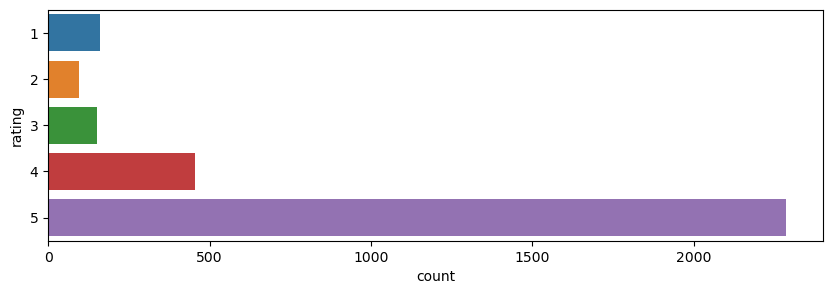

In [26]:
# now lets make a box plot of income and loan amount
plt.figure(figsize=(10,3))
sns.countplot(y=data["rating"])

In [27]:
# distinct values of feedback and it's counts
data["feedback"].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

<Axes: xlabel='feedback'>

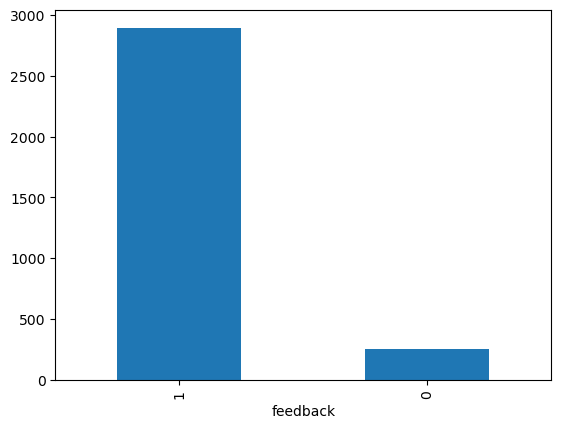

In [28]:
# creating a bar chart for feedback
data["feedback"].value_counts().plot.bar()

In [29]:
# checking the ratings for feedback 1
data[data["feedback"]==1]["rating"].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [30]:
# checking the ratings for feedback 0
data[data["feedback"]==0]["rating"].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [31]:
# check for the variation column
data["variation"].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

<Axes: xlabel='variation'>

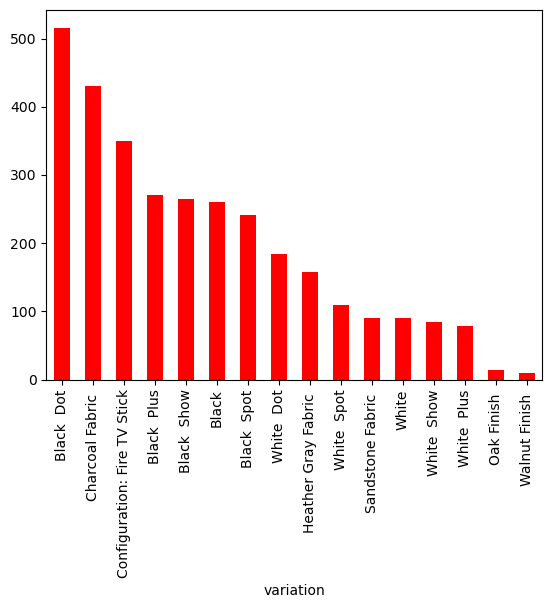

In [33]:
data["variation"].value_counts().plot.bar(color="red")

In [35]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [37]:
# convert words into text
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

# combining all reviews 
reviews = " ".join([review for review in data["verified_reviews"]])

# Preprocessing and Modeling 
To build the corpus from the verified reviews  we perform the following-
1 replace any non alphabetic character with space
2 convert to lower case and split into words
3 iterate over the individual words and if it is not a stopword then add the stemmer form of the word to the corpus

In [38]:
corpus=[]
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z0-9]', " ",data.iloc[i]["verified_reviews"])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [40]:
# using countvectroizer(max_feature = 2500)
cv = CountVectorizer(max_features = 2500)

# storing Indipendent and Dependent Variable in x and y
x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [43]:
# cheking the shape of x and y
x.shape,y.shape

((3149, 2500), (3149,))

In [45]:
# spliting the data into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",x_train.shape)
print("y_test shape:",x_test.shape)

x_train shape: (2519, 2500)
x_test shape: (630, 2500)
y_train shape: (2519, 2500)
y_test shape: (630, 2500)


In [47]:
# calling the decision tree model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [48]:
# fitting the training data into the mode
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
# predicting the value for test data set
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
# Accuracy score of the model
print("Training_accuracy:", model.score(x_train,y_train))
print("Testing_accuracy:", model.score(x_test,y_test))
# our model is 93% accurate

Training_accuracy: 0.9952362048431918
Testing_accuracy: 0.9301587301587302
